# Рубежный контроль №1
# Вариант №10

## Выполнил: Ли М.В.  Группа: ИУ5-64Б
### Задание:
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Дополнительно: для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
%matplotlib inline 
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('data/dc-wikia-data.csv', sep = ",")

In [3]:
# Посмотрим первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [4]:
# Посмотрим типы данных
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [5]:
# Выведем количество пропусков в атрибутах
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

### Обработка пропусков в данных для количественного признака

In [6]:
total_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        total_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 355, 5.15%.
Колонка YEAR. Тип данных float64. Количество пустых значений 69, 1.0%.


Выберем колонку YEAR, в которая имеет 5.15% пропусков.

In [7]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[total_cols]
data_num

,APPEARANCES,YEAR
0,3093.0,1939.0
1,2496.0,1986.0
2,1565.0,1959.0
3,1316.0,1987.0
4,1237.0,1940.0
...,...,...
6891,NaN,NaN
6892,NaN,NaN
6893,NaN,NaN
6894,NaN,NaN


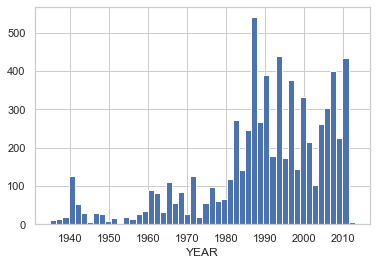

In [8]:
# Заполним значения по среднему
med_imp = SimpleImputer(strategy="mean")
med_rat = med_imp.fit_transform(data[['YEAR']])
plt.hist(med_rat, 50)
plt.xlabel('YEAR')
plt.show()

### Обработка пропусков в данных для категориального признака


In [9]:
total_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        total_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.


In [10]:
# GSM имеет 99% пропусков
cat_temp_data = data[['GSM']]
cat_temp_data.head()

,GSM
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [11]:
# Выполним удаление данного признака
data.drop(['GSM'], axis=1, inplace=True)

In [12]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,"1940, April",1940.0


Также заполним колонку SEX наиболее встречающимися значениями

In [13]:
cat_temp_data = data[["SEX"]]
pd.unique(data["SEX"])

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters'], dtype=object)

In [14]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Male Characters'],
       ['Male Characters'],
       ['Male Characters'],
       ...,
       ['Male Characters'],
       ['Male Characters'],
       ['Male Characters']], dtype=object)

### Пострим скрипичная диаграмму для APPEARANCES	

<AxesSubplot:xlabel='APPEARANCES'>

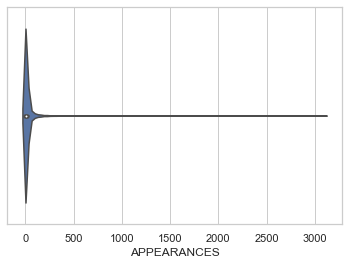

In [15]:

sns.violinplot(x=data['APPEARANCES'])

### Ответы на вопросы

В данной работе для обработки пропусков данных я воспользовался двумя способами: 
1) Для обработки количественного признака,рассматривая колонку YEAR, мы использовали заполнение по среднему значению; 

2) Для обработки категориального признака, в котором количество пропусков не превышает порогового значения (5%), путем заполнения наиболее часто встречаемым значением, я заполнил колонку SEX,а также удалил колонку GSM, имеющая 99% пропусков. 

Я считаю для построения моделей машинного обучения следует использовать следующие призанки: SEX, ALIGN, ALIVE, FIRST APPEARANCES, так как имеют наименший процент пропусков => данные имеют более точные значения.